# Evaluating Classifiers
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.
<article class="message is-info">
  <div class="message-header">Info</div>
  <div class="message-body">

  Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive



  </div>
</article>

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training Support Vector Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Performance metrics</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data
<article class="message task"><a class="anchor" id="import"></a>
    <div class="message-header">
        <span>Task 1: Generating Data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.



</div></article>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 
<article class="message task"><a class="anchor" id="First"></a>
    <div class="message-header">
        <span>Task 2: Training Support Vector Classifier</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to train a Linear Support Vector Classifier ([`LinearSVC`
](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
).



</div></article>



In [2]:
classifier1 = LinearSVC(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)

LinearSVC(C=0.1, random_state=1)

<article class="message task"><a class="anchor" id="accuracy"></a>
    <div class="message-header">
        <span>Task 3: Model accuracy</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `LinearSVC`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 



</div></article>



Accuracy for test_set: 0.93 
Accuracy for training_set: 0.23


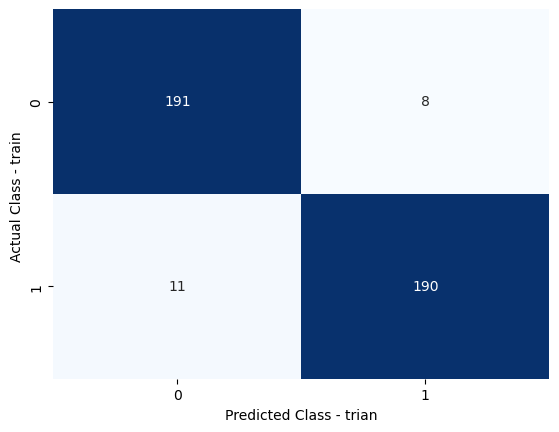

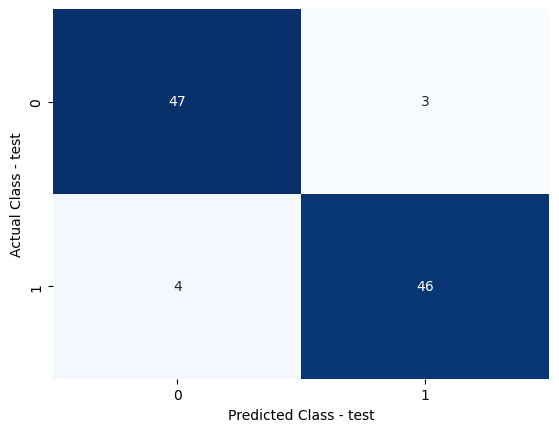

In [14]:
Y_preds = classifier1.predict(X_test)
Y_preds2 = classifier1.predict(X_train)

correct_predictions_test_set = 0
correct_predictions_training_set = 0

for i in range(len(Y_preds)):
    if Y_preds[i] == Y_test[i]:
        correct_predictions_test_set += 1
    if Y_preds2[i] == Y_train[i]:
        correct_predictions_training_set += 1

# Calculate accuracy here ... 
accuracy_test_set = correct_predictions_test_set / len(Y_preds)
accuracy_training_set = correct_predictions_training_set / len(Y_preds2)

print(f"Accuracy for test_set: {accuracy_test_set} \nAccuracy for training_set: {accuracy_training_set}")

conf_mat_train = confusion_matrix(Y_train, Y_preds2)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class - trian')
plt.ylabel('Actual Class - train ')
plt.show()

conf_mat_test = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class - test')
plt.ylabel('Actual Class - test')
plt.show()

**Performance metrics**
<article class="message is-info">
  <div class="message-header">Recall from the lecture</div>
  <div class="message-body">
  
  Performance metrics such as **precision**, **recall**, **F$_1$-score**, and **specificity**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F$_1$-score** - harmonic mean of precision & recall. 

$$
2∗\frac{\text{Precision}∗\text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$




  
  </div>
</article>

<article class="message task"><a class="anchor" id="classif_report"></a>
    <div class="message-header">
        <span>Task 4: Performance metrics</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the confusion matrix from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity


3. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?




</div></article>



In [27]:
# write your solution here

# 1.
true_positive_train, false_positive_train, false_negative_train, true_negative_train = conf_mat_train.ravel()
true_positive_test, false_positive_test, false_negative_test, true_negative_test = conf_mat_test.ravel()

# 2. 
precision_train = true_positive_train / (true_positive_train + false_positive_train)
precision_test = true_positive_test / (true_positive_test + false_positive_test)

recall_train = true_positive_train / (true_positive_train + false_negative_train)
recall_test = true_positive_test / (true_positive_test + false_negative_test)

f_1_score_train = 2 * ((precision_train * recall_train) / (precision_train + recall_train))
f_1_score_test = 2 * ((precision_test * recall_test) / (precision_test + recall_test))

specificity_train = true_negative_train / (true_negative_train + false_positive_train)
specificity_test = true_negative_test / (true_negative_test + false_positive_test)

print(f"Precision\n - Train: {precision_train} Test: {precision_test}")
print(f"Recall\n - Train: {recall_train} Test: {recall_test}")
print(f"F_1 Score\n - Train: {f_1_score_train} Test: {f_1_score_test}")
print(f"Specificity\n - Train: {specificity_test} Test: {specificity_train}")


Precision
 - Train: 0.9597989949748744 Test: 0.94
Recall
 - Train: 0.9455445544554455 Test: 0.9215686274509803
F_1 Score
 - Train: 0.9526184538653367 Test: 0.9306930693069307
Specificity
 - Train: 0.9387755102040817 Test: 0.9595959595959596


## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [0]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

<article class="message task"><a class="anchor" id="svc_model"></a>
    <div class="message-header">
        <span>Task 5: Class Imbalance</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights hard"></i>
        </span>
    </div>
<div class="message-body">


The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop to:
    - Train `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate accuracy on the validation folds and store the values.


2. Run the cell below to plot the accuracy of the model on each fold. What does the plot tell you about classification performance?

3. Extend the loop to calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 

4. Why do some of the metrics return NaNs?

5. Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?

6. Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?




</div></article>



In [0]:
classifier2 = SVC()

accuracies= []
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []

for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

    # write your solution here


# Step 2
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# step 5
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']

# Create a list of the values for each metric
metric_values = [accuracies, precisions, recalls, f1_scores, specificities]

# Plot the metrics on the same plot
plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()

In [0]:
# write your reflections here

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.
<article class="message task"><a class="anchor" id="metrics"></a>
    <div class="message-header">
        <span>Task 6: ROC and Precision-Recall curves</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.
2. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
3. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.



</div></article>



In [0]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()